In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


Attribute Information:

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
  * 1 -- building_windows_float_processed
  * 2 -- building_windows_non_float_processed
  * 3 -- vehicle_windows_float_processed
  * 4 -- vehicle_windows_non_float_processed (none in this database)
  * 5 -- containers
  * 6 -- tableware
  * 7 -- headlamps

In [46]:
dataset = pd.read_csv('trainKNN.txt',header = None)
# adding column name to the respective columns
dataset.columns =['Id','RI', 'Na', 'Mg','Al','Si','K','Ca','Ba','Fe','Type of glass']

In [47]:
dataset.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [48]:
dataset.iloc[:,1:-1].corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.158559,-0.153610,-0.446641,-0.530520,-0.296570,0.821277,0.009425,0.104980
Na,-0.158559,1.000000,-0.216384,0.234219,-0.196462,-0.248626,-0.278983,0.336526,-0.250335
Mg,-0.153610,-0.216384,1.000000,-0.520530,-0.095263,-0.039185,-0.461244,-0.488494,0.066167
Al,-0.446641,0.234219,-0.520530,1.000000,0.010147,0.335160,-0.284701,0.477098,-0.067659
Si,-0.530520,-0.196462,-0.095263,0.010147,1.000000,-0.181488,-0.197767,-0.162194,-0.058347
K,-0.296570,-0.248626,-0.039185,0.335160,-0.181488,1.000000,-0.321540,-0.019632,-0.011720
Ca,0.821277,-0.278983,-0.461244,-0.284701,-0.197767,-0.321540,1.000000,-0.100585,0.120076
Ba,0.009425,0.336526,-0.488494,0.477098,-0.162194,-0.019632,-0.100585,1.000000,-0.030133
Fe,0.104980,-0.250335,0.066167,-0.067659,-0.058347,-0.011720,0.120076,-0.030133,1.000000


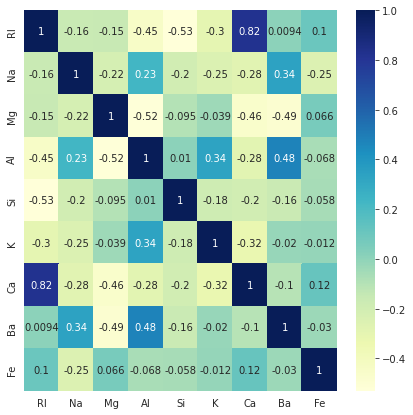

In [49]:
import seaborn as sb
plt.figure(figsize=(7, 7))
# plotting correlation heatmap
dataplot = sb.heatmap(dataset.iloc[:,1:-1].corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

Arranging dataset into the Training set and Test set**

In [50]:
X_train = dataset.iloc[:,1:-1]
y_train = dataset.iloc[:,-1]

In [51]:
X_train.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [52]:
y_train.head(5)

0    1
1    1
2    1
3    1
4    1
Name: Type of glass, dtype: int64

In [53]:
dataset_test = pd.read_csv('testKNN.txt',header = None)
dataset_test.columns =['Id','RI', 'Na', 'Mg','Al','Si','K','Ca','Ba','Fe','Type of glass']
X_test = dataset_test.iloc[:,1:-1]
y_test = dataset_test.iloc[:,-1]

In [54]:
X_test.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17
1,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03
3,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00
4,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24


In [55]:
y_test.head(5)

0    1
1    1
2    1
3    2
4    2
Name: Type of glass, dtype: int64

**EDA with pairplot**

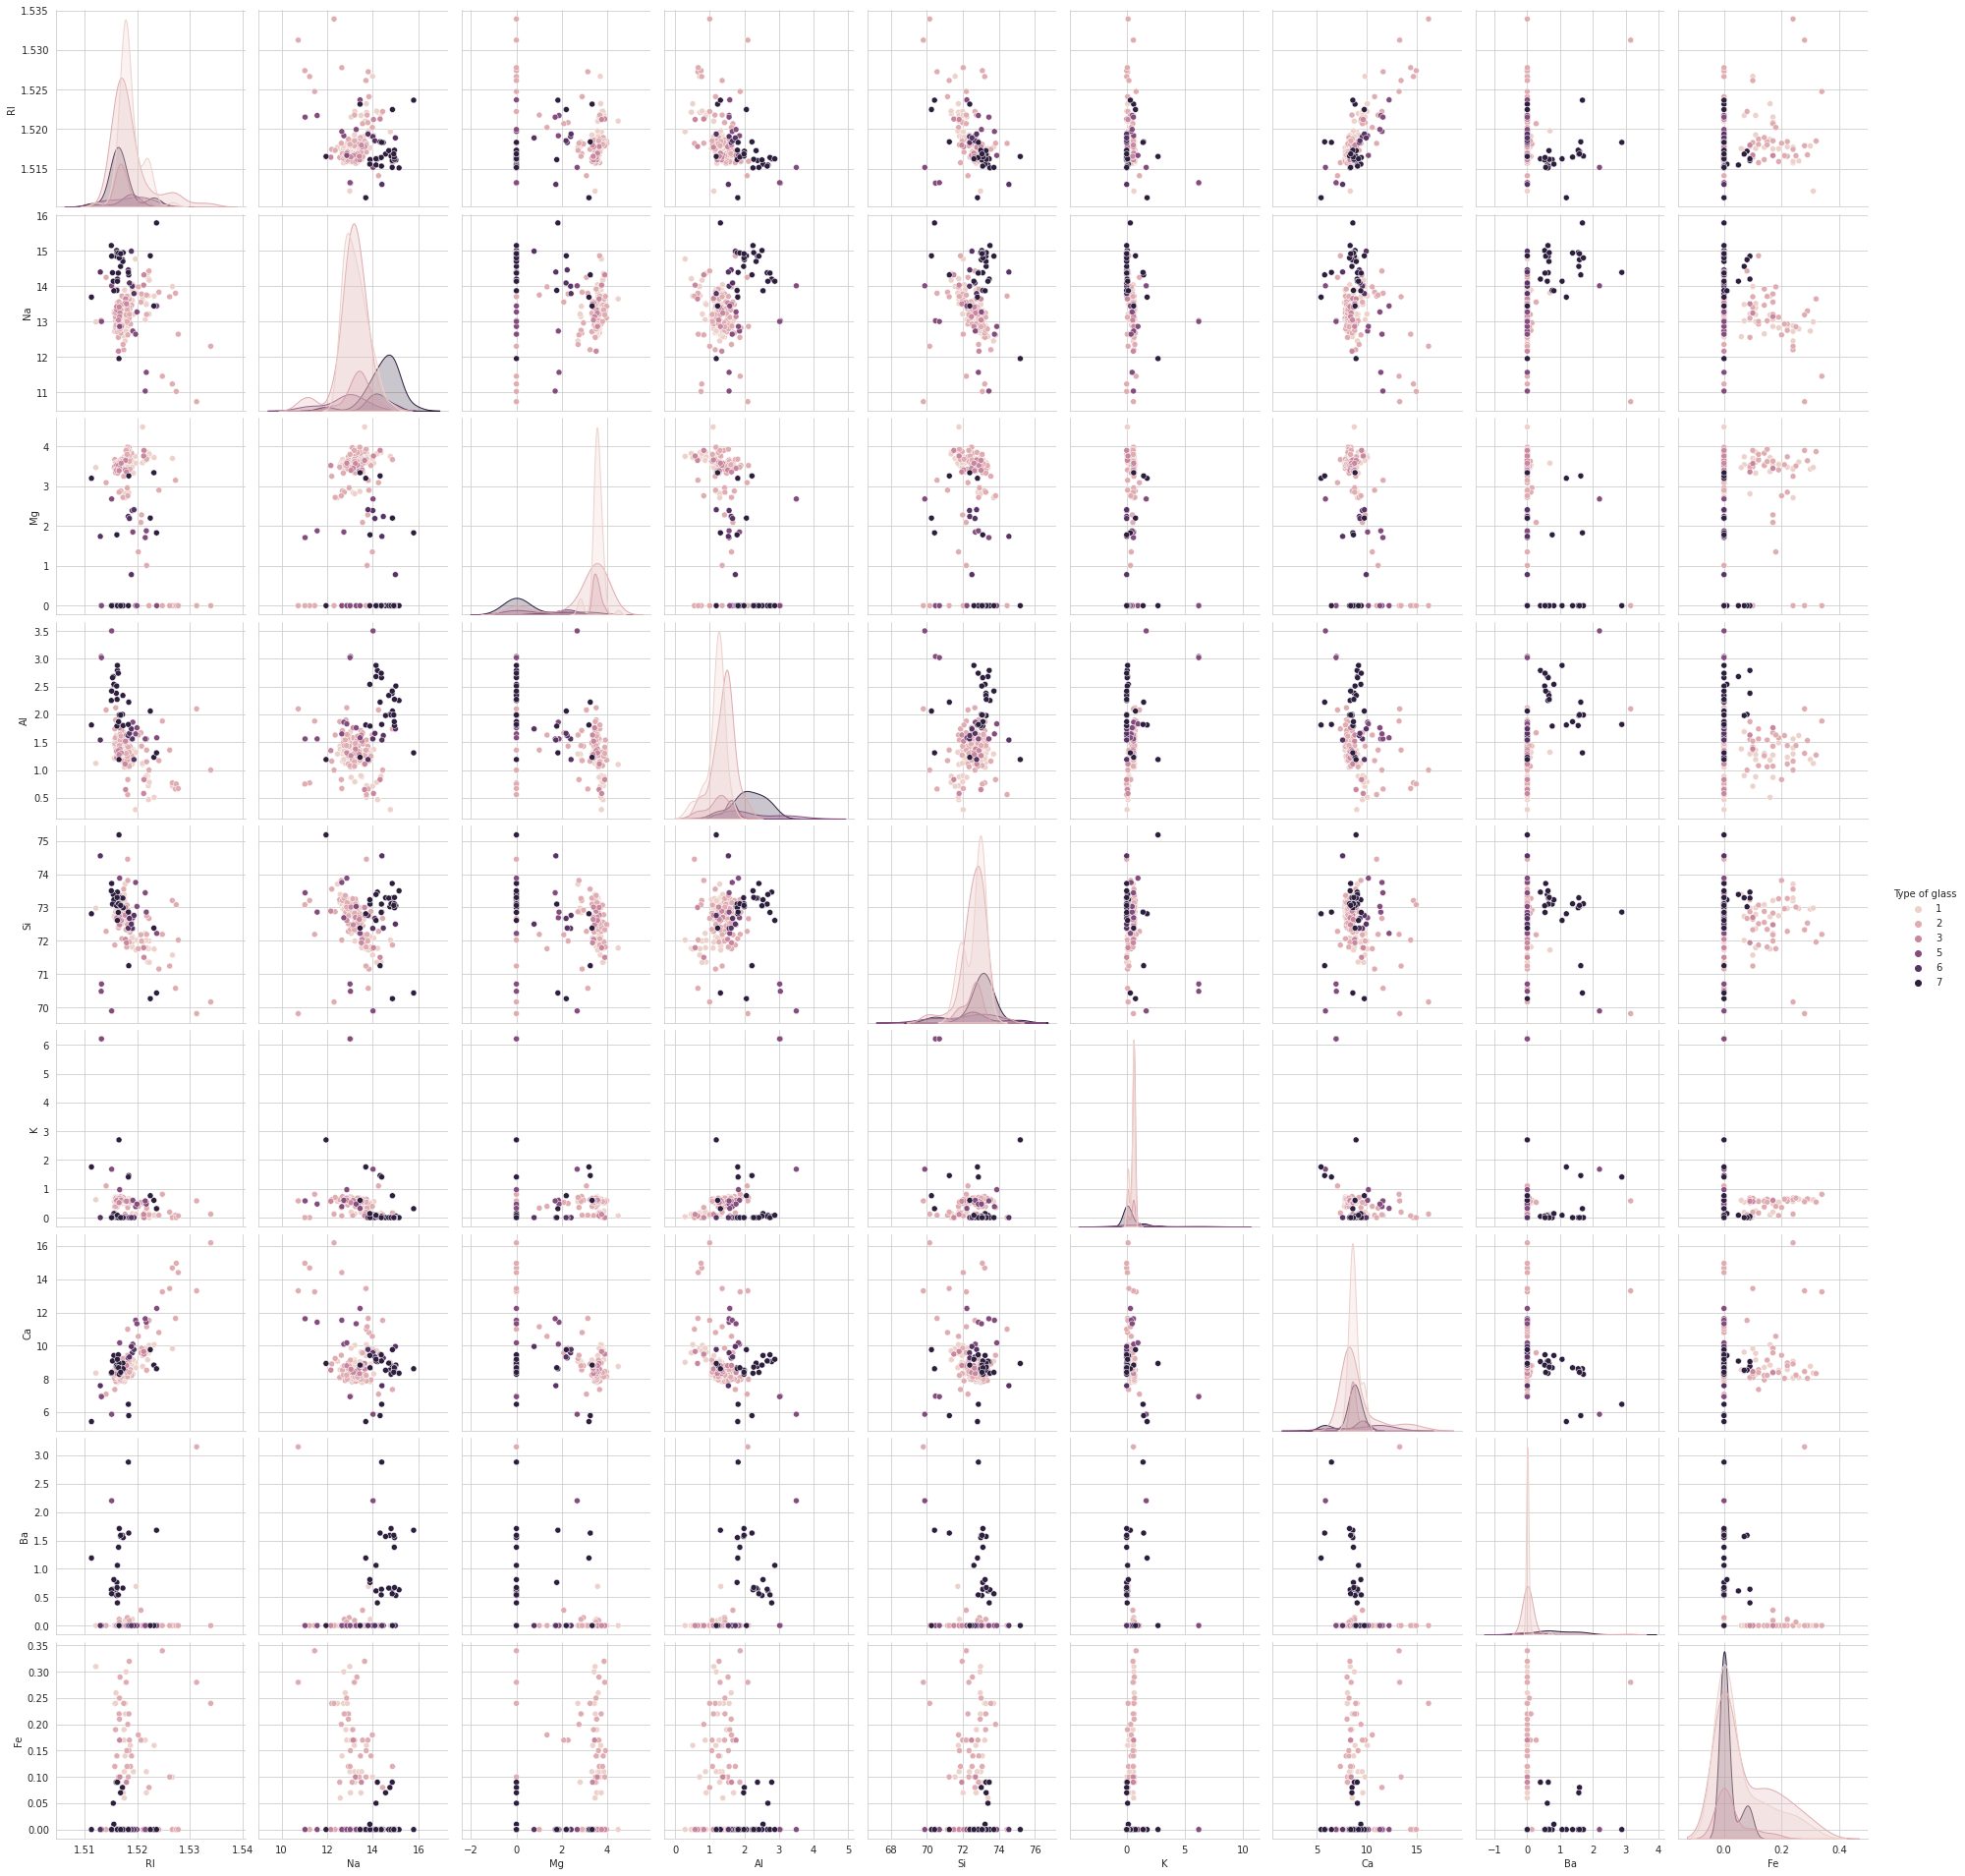

In [56]:
sns.set_style("whitegrid");
sns.pairplot(dataset.iloc[:,1:], hue='Type of glass', height=3);
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


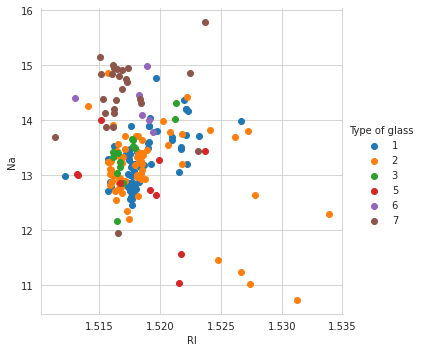

In [57]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset.iloc[:,1:], hue='Type of glass', size=5) \
.map(plt.scatter,"RI","Na") \
.add_legend();
plt.show()

**Feature Scaling**

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
X_train.shape

(196, 9)

**Fitting the K-NN**

Applying Grid Search to find the best model and the best parameters

In [60]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
#classifier.fit(X_train, y_train)

In [61]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors': [5, 6, 7, 8, 9, 10], 'weights': ['uniform','distance'],'p':[1]},
              {'n_neighbors': [5, 6, 7, 8, 9, 10], 'weights': ['uniform','distance'],'p':[2]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


Best Accuracy: 70.45 %
Best Parameters: {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


In [62]:
classifier = KNeighborsClassifier(n_neighbors= 5, p =  2, weights = 'distance')
classifier.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [63]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 70.45 %
Standard Deviation: 12.13 %


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


Predicting the test set results

In [64]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Making the Confusion Matrix

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3 0 0 0 0 0]
 [1 2 0 0 0 0]
 [0 3 0 0 0 0]
 [0 2 0 1 0 0]
 [0 1 0 0 1 1]
 [0 0 0 0 0 3]]


0.5555555555555556

**Applying PCA**

In [66]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2,kernel ='linear')
X_train_pca = kpca.fit_transform(X_train)
X_test_pca = kpca.transform(X_test)

In [67]:
classifier = KNeighborsClassifier(n_neighbors= 5, p =  2, weights = 'distance')
classifier.fit(X_train_pca, y_train)

KNeighborsClassifier(weights='distance')

In [68]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train_pca, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 65.74 %
Standard Deviation: 6.01 %


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


In [69]:
y_pred = classifier.predict(X_test_pca)

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f} %".format(acc*100))

[[3 0 0 0 0 0]
 [1 2 0 0 0 0]
 [1 1 1 0 0 0]
 [0 3 0 0 0 0]
 [0 2 0 0 1 0]
 [0 0 0 0 0 3]]
Accuracy: 55.56 %


**Visualising the test dataset with pca components**

In [71]:
principal_Df = pd.DataFrame(data = X_train_pca, columns = ['principal component 1', 'principal component 2'])
principal_Df['y'] = y_train

In [72]:
principal_Df.tail(5)

,principal component 1,principal component 2,y
191,-2.051207,2.908531,7
192,-3.475197,3.777504,7
193,-1.947332,2.673156,7
194,-2.355697,3.196571,7
195,-2.270468,3.184110,7


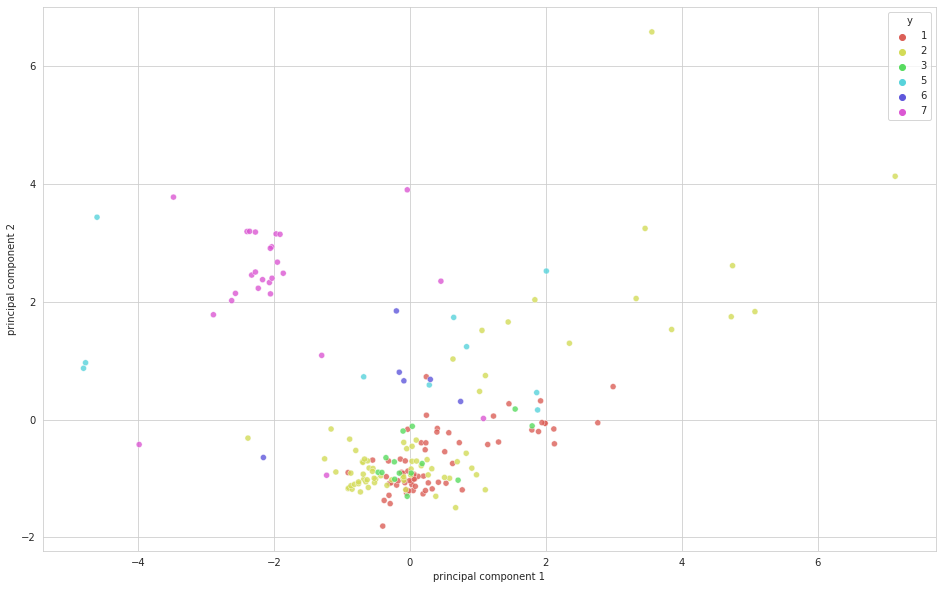

In [73]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    data=principal_Df,
    palette=sns.color_palette("hls"),
    legend="full",
    alpha=0.8
)

**Applying Linear Discriminant Analysis**

In [74]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
lda.fit(X_train, y_train)


LinearDiscriminantAnalysis(n_components=2)

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = lda.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f} %".format(acc*100))

[[3 0 0 0 0 0]
 [1 2 0 0 0 0]
 [2 1 0 0 0 0]
 [0 2 1 0 0 0]
 [0 0 0 0 2 1]
 [0 0 0 0 0 3]]
Accuracy: 55.56 %
